## Implement a simple deep neural network (DNN) for solving the polynomial equation with the following specifications:


### import necessary modules 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Activation
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [2]:
def calculate_y (x):
    return (5 *(x **3) - 10 * (x **2) -20 * x + 10) 

### (a) Use three hidden-layers of sizes 32, 64, and 128 to build the DNN model

In [3]:
def dnn_model():
    input = Input(shape=(1,), name='input')
    x = Dense(32, activation='relu', name='dense_1')(input)
    x = Dense(64, activation='relu', name='dense_2')(x)
    x = Dense(128, activation='relu', name='dense_3')(x)
    output = Dense(1, name='output')(x)

    model = Model(inputs=input, outputs=output)
    return model

### (a) Display the generated DNN model with the required number of parameters

In [4]:
model = dnn_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

### (b) Generate training samples within the range of -20 to +20

In [5]:
def generate_data(n):
    x = np.random.uniform(-20, 20, n)
    y = calculate_y(x)
    return x, y

### Use an appropriate method for normalizing the training data in the range of -1 to +1

In [6]:
def normalize_data(values):
    min = np.min(values)
    max = np.max(values)
    return (2 * (values - min) / (max - min)) - 1


### (c) Use 5% of the samples as test data and 5% of the samples as validation data and the rest of the data for training the DNN with an appropriate number of epochs.

In [7]:
n = 5000 
x , y = generate_data(n)

# Normalize the data
x = normalize_data(x)
y = normalize_data(y)

# Split the data into training and testing sets

X_tarin, Y_train = x[:int(n*0.9)], y[:int(n*0.9)]

# Validation set
X_val, Y_val = x[int(n*0.9): int(n* 0.95)], y[int(n*0.9):int(n* 0.95)]

# Test set
X_test, Y_test = x[int(n*0.95):], y[int(n*0.95):]


### Training 

In [11]:
# Correct the optimizer instantiation
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=[metrics.R2Score(name='accuracy')])
fitted_model = model.fit(X_tarin, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

history = fitted_model.history

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7596 - loss: 0.0355 - val_accuracy: 0.9922 - val_loss: 0.0011
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9960 - loss: 6.0764e-04 - val_accuracy: 0.9982 - val_loss: 2.5365e-04
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9989 - loss: 1.6147e-04 - val_accuracy: 0.9996 - val_loss: 5.6682e-05
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 5.9018e-05 - val_accuracy: 0.9998 - val_loss: 3.0838e-05
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 2.3729e-05 - val_accuracy: 0.9999 - val_loss: 2.1117e-05
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9999 - loss: 1.7097e-05 - val_accuracy: 0.9999 - val_loss: 9.8887e-06
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9999 - loss: 8.7709e-06 - val_accuracy: 1.0000 - val_loss: 5.6611e-06
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

### (d) Display the training accuracy vs validation accuracy and training error vs validation error curves

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9999 - loss: 2.0542e-05
Test Loss: 1.912589868879877e-05
Test Accuracy: 0.9998635053634644
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


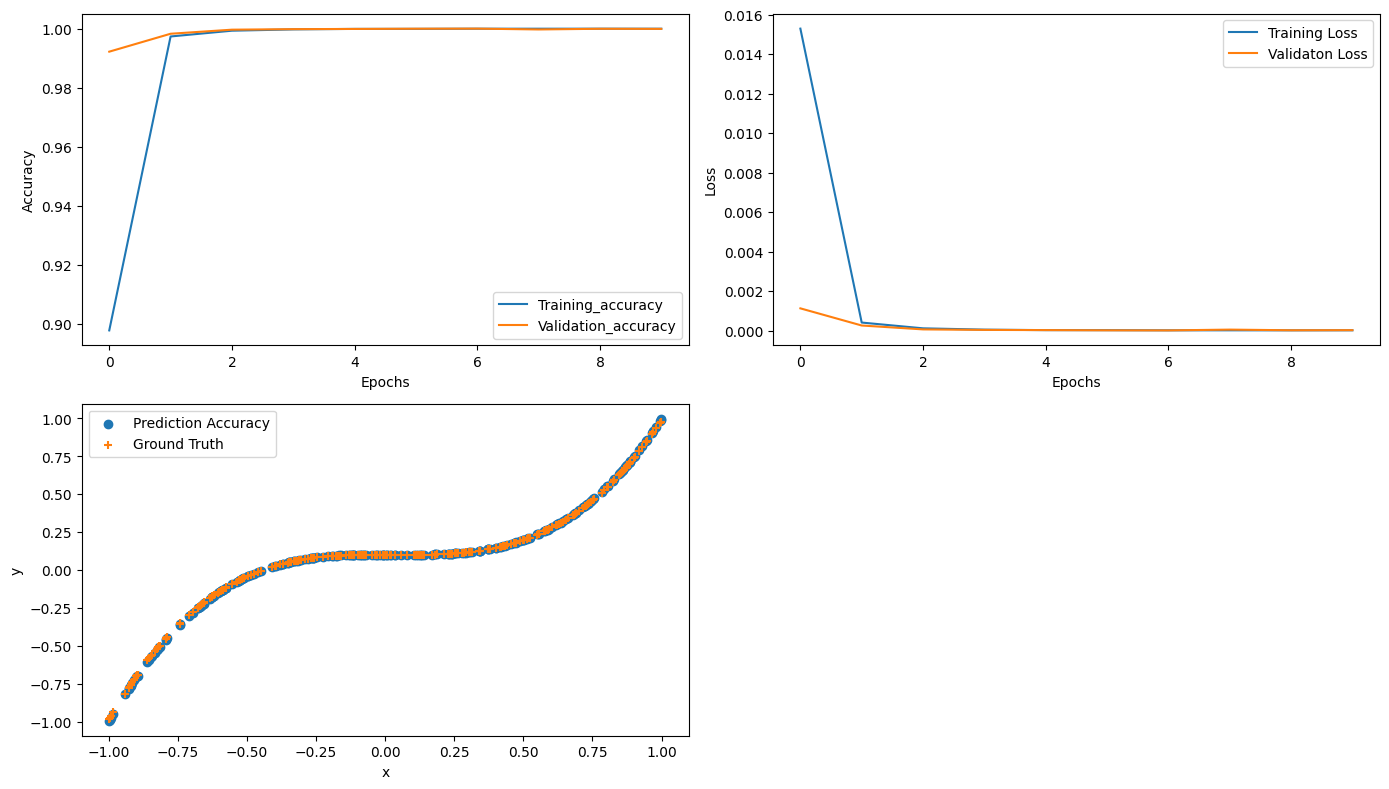

In [12]:
plt.figure(figsize=(14, 8))

# Plot Training and Validation Accuracy
plt.subplot(2,2,1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_accuracy', 'Validation_accuracy'])


# Plot Training and Validation Loss
plt.subplot(2,2,2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validaton Loss'])

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict on test data
predictions = model.predict(X_test)

# Plot prediction accuracy vs ground truth
plt.subplot(2,2,3)
plt.scatter(X_test,Y_test, marker='o')
plt.scatter(X_test, predictions, marker='+')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(['Prediction Accuracy', 'Ground Truth'])

plt.tight_layout()
plt.show()
